In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nsimpkg.random_variables import NormalRV, MixNormalRV
from nsimpkg.gaussian_OAIS import Adam_OAIS
from nsimpkg.mcsim import mcsim, rho
from nsimpkg.plotting import plot_contours, plotter, fill_z
np.random.seed(0)


plt.rcParams['figure.dpi'] = 300

q = NormalRV(np.array([10, -10]), np.array([[40, 0], [0, 40]]))
pi = NormalRV(np.array([1, -1]), np.array([[2, -0.5], [-0.5, 2]]))
GT = 0.195595

def phi(x):
    return (np.sum(np.abs(x) < 1, axis=0) == 2).astype(int)

N = 1000
Niter = int(1e4)
alpha_Adam = 1e-2
nexperiments = 10
results_array_Adam = []
distribution_array_Adam = []
for _ in range(nexperiments):
    r_Adam, d_Adam = Adam_OAIS(phi, pi, q, N, Niter, alpha=alpha_Adam)
    results_array_Adam.append(r_Adam)
    distribution_array_Adam.append(d_Adam)

100%|██████████| 10000/10000 [01:40<00:00, 99.68it/s]


In [21]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter, plot_contours, plot_mse

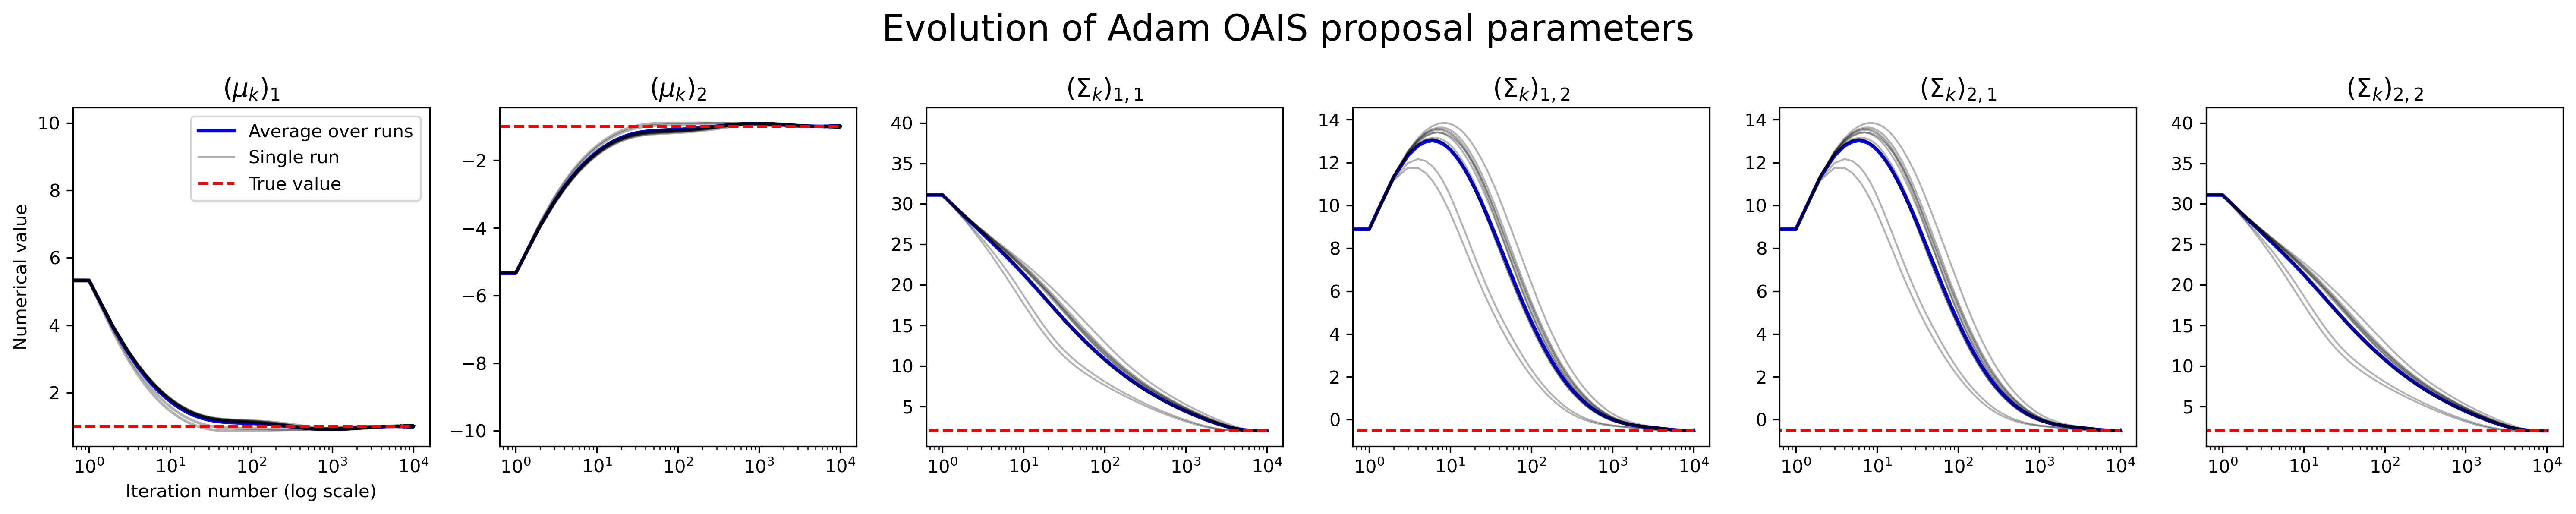

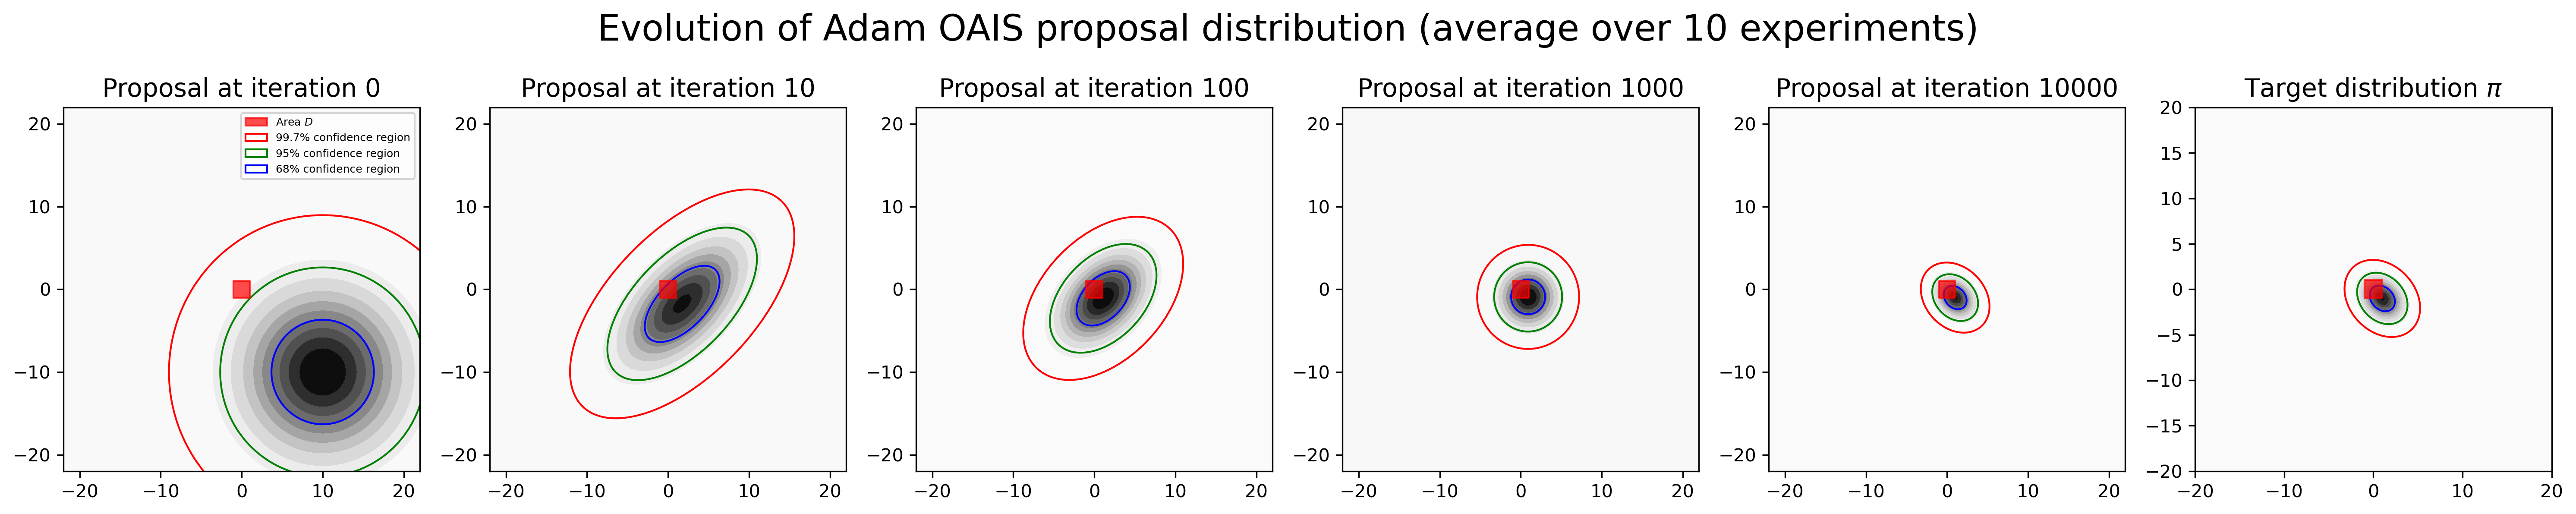

In [22]:

optimiser = "Adam"
title = f"Evolution of {optimiser if optimiser != 'SGD' else 'SG'} OAIS proposal parameters"
plotter(distribution_array_Adam, pi, title=title, mix=False, alpha=0.3)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/params_evolution.png")
plt.show()
plot_contours(distribution_array_Adam, pi, title=f"Evolution of {optimiser} OAIS proposal distribution (average over {nexperiments} experiments)", mix=False)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/{optimiser}_contours.png")
plt.show()

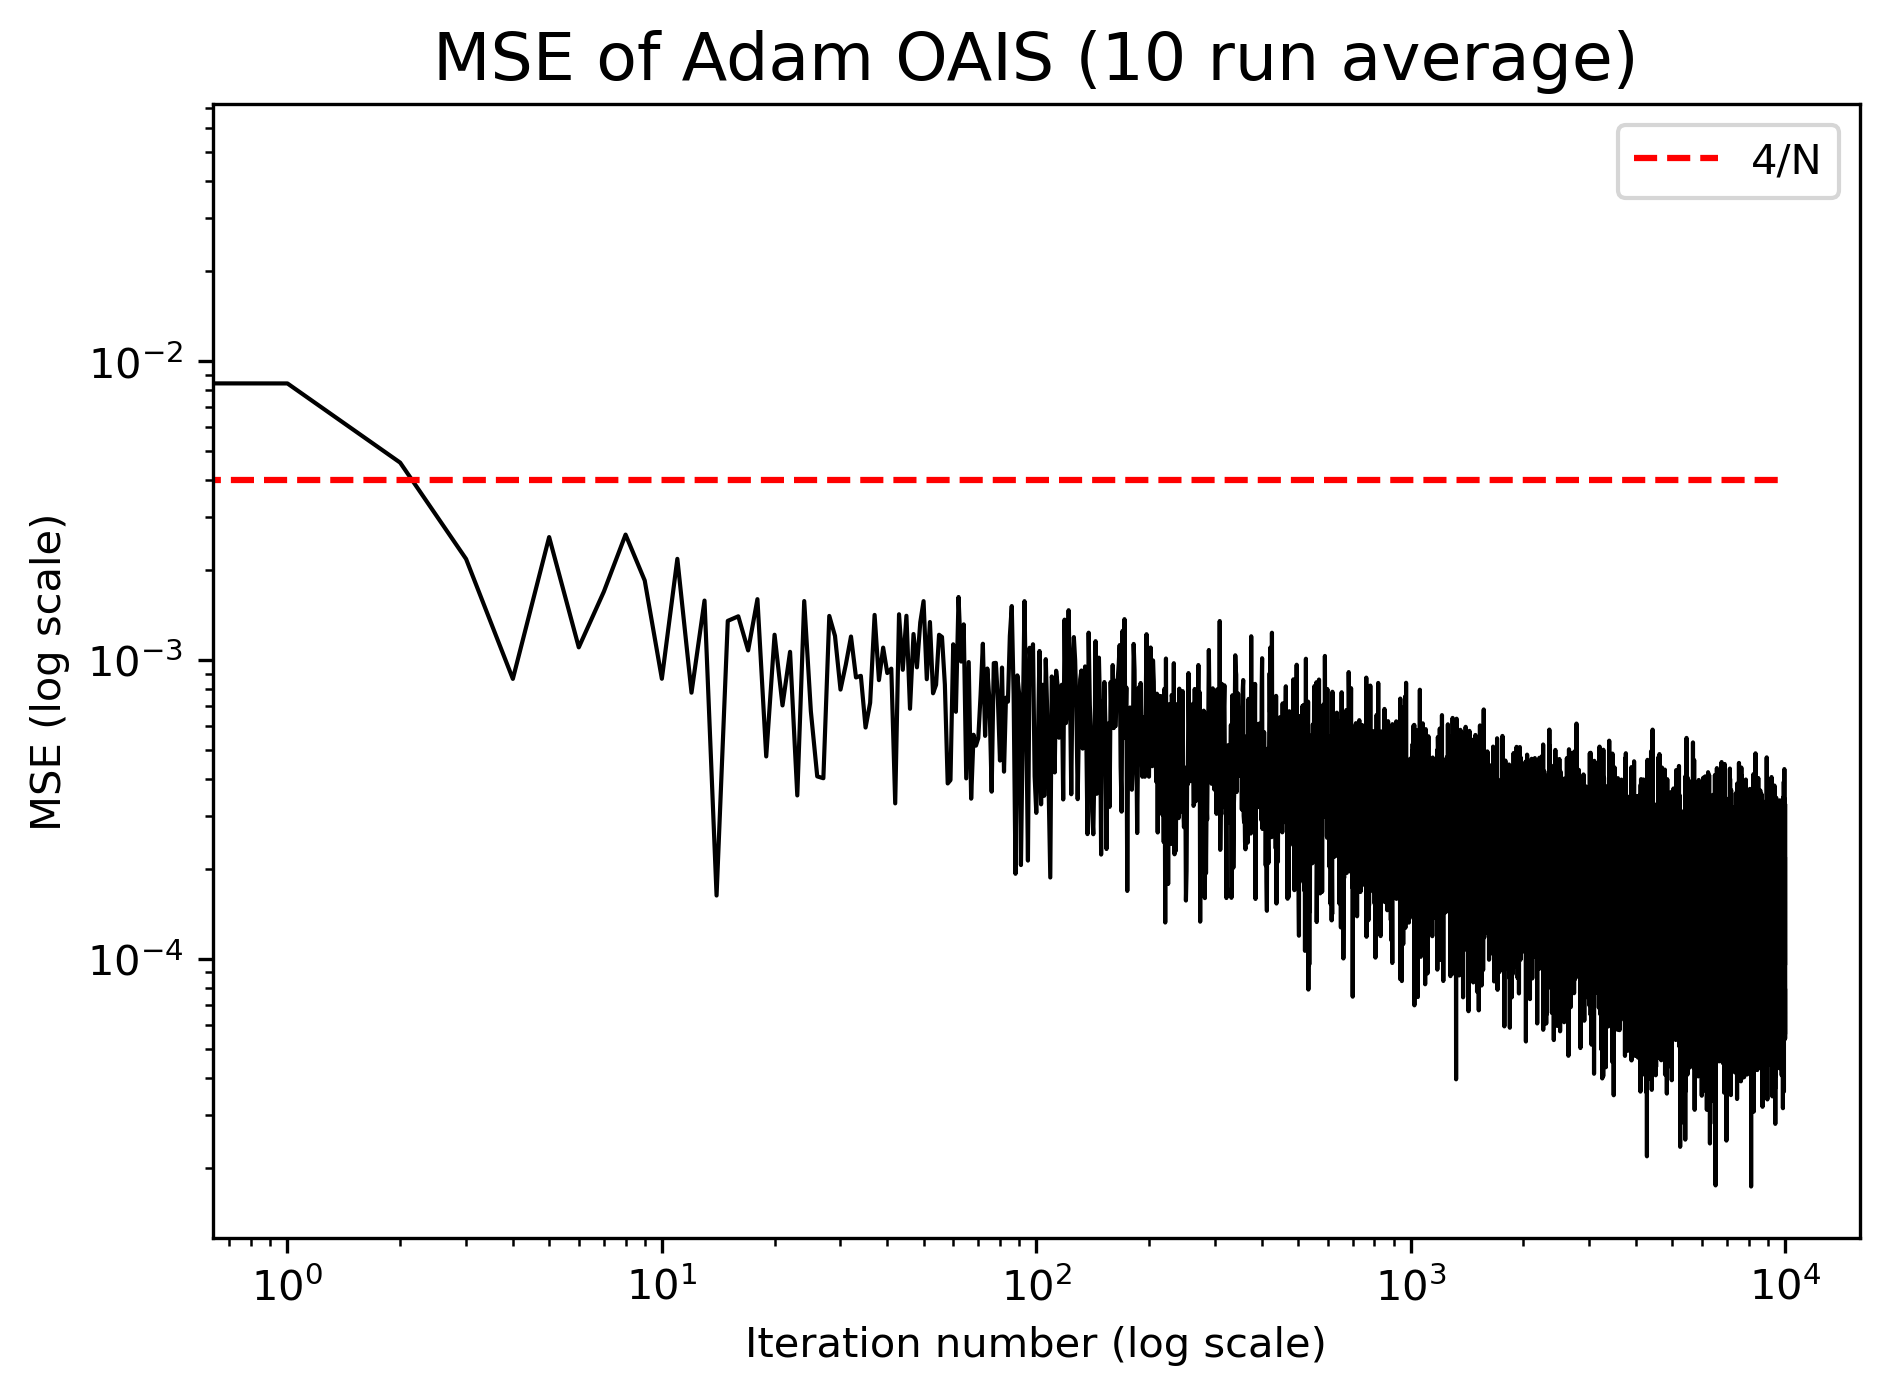

In [11]:
plot_mse(results_array_Adam, GT, title=f"MSE of {optimiser} OAIS (average over {nexperiments} experiments)", xlog=True, ylog=True)
plt.title(f"MSE of {optimiser} OAIS ({nexperiments} run average)", fontsize=16)
plt.hlines(4/N, 0, Niter, colors='r', linestyles='dashed', label="4/N")
plt.legend()
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/mse.png")
plt.show()

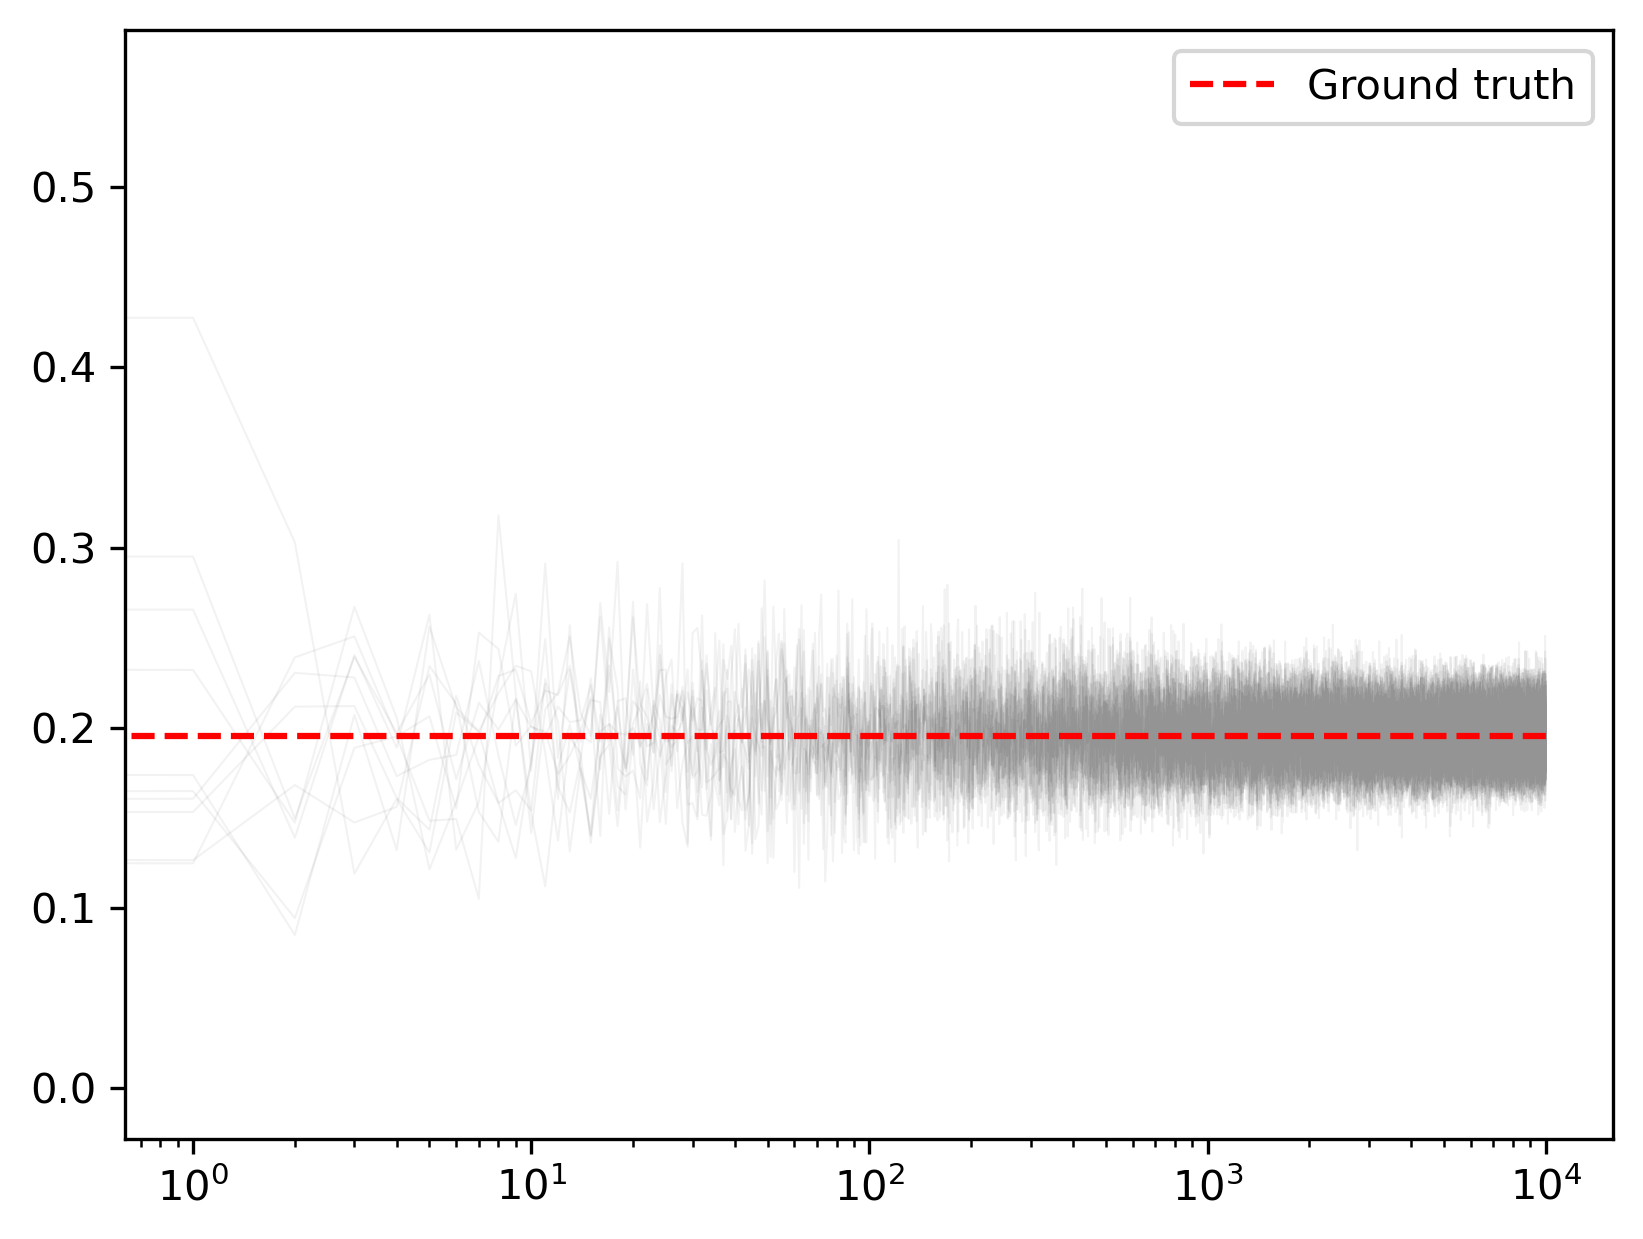

In [44]:
for experiment in results_array_Adam:
    plt.plot(experiment, alpha=0.05, color="black", linewidth=0.5)

plt.hlines(GT, 0, Niter, color="red", label="Ground truth", linestyles="dashed")
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.show()